# Feature Engineering by rows
## Alcoholic and Control

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os import listdir
root="./dataset";


# It is going to take a while to read all the data
#linecounter= 0
#filecounter=0
df = pd.DataFrame(columns=['user_id', 'alcoholic', 'paradigm','replication','Channel','Min','Max','Sd','Mean',
                               'Median','IQR','0.025','0.25','0.5','0.75','0.975'])
cont=0;
for file in listdir("./dataset"):


        # Renaming the file
        
        #filecounter= filecounter + 1
        
        file_root = root + "/" + file
        print(file_root)
        if(file!=".DS_Store"):
            read_file = open(file_root, 'r')
            read_file.readline()
            counterinside=0
            user = []
            alcoholic=[]
            paradigm=[]
            replication=[]
            channel=[]
           
            # For each line we separate the values to add them in the created dataframe
            for line in read_file:
               # if(filecounter<=5):
                #    linecounter= linecounter + 1
                
                firstline = line.split("  ")
                lineeg=[]

                for i in range(len(firstline)-1):
                    

                    if i==0:
                        user.append(float(firstline[i]))
                    elif i==1:
                        alcoholic.append(firstline[i])

                    elif i==2:

                        paradigm.append(firstline[i])

                    if i==3:

                        replication.append(float(firstline[i]))
                    elif i>=4:
                        if i==4:
                            channelline=firstline[i].split(" ")
                            channel.append(channelline[0])
                            if channelline[1][0]=='c':
                                canal=channelline[1][1:]
                                lineeg.append(float(canal))

                            else:
                                lineeg.append(float(channelline[1]))

                        else:
                            lineeg.append(float(firstline[i]))

              
                datachannel = pd.DataFrame(lineeg)
                min = datachannel.min()
                max = datachannel.max()
                sd = datachannel.std()
                mean = datachannel.mean()
                quantil0=datachannel.quantile(.025)
                quantil1=datachannel.quantile(.25)
                median=datachannel.quantile(.5)
                quantil3=datachannel.quantile(.75)
                quantil4=datachannel.quantile(.975)
                iqr=quantil3[0]-quantil1[0]
                # counterinside is the one which goes through the lines of the current file
                # cont is the counter which goes through all the files
                df.loc[cont]=[user[counterinside],alcoholic[counterinside],paradigm[counterinside],replication[counterinside],channel[counterinside],min[0],max[0],
                              sd[0],mean[0],median[0],iqr,quantil0[0],quantil1[0],median[0],quantil3[0],quantil4[0]]
               
                cont= cont +1
                counterinside= counterinside + 1

./dataset/co2a0000364.txt
./dataset/co2a0000365.txt
./dataset/co2a0000368.txt
./dataset/co2a0000369.txt
./dataset/co2a0000370.txt
./dataset/co2a0000371.txt
./dataset/co2a0000372.txt
./dataset/co2a0000375.txt
./dataset/co2a0000377.txt
./dataset/co2a0000378.txt
./dataset/co2c0000337.txt
./dataset/co2c0000338.txt
./dataset/co2c0000339.txt
./dataset/co2c0000340.txt
./dataset/co2c0000341.txt
./dataset/co2c0000342.txt
./dataset/co2c0000344.txt
./dataset/co2c0000345.txt
./dataset/co2c0000346.txt
./dataset/co2c0000347.txt


## Separate target and features



In [2]:
from sklearn.preprocessing import StandardScaler

features =['Min','Max','Sd','Mean',
                           'Median','IQR','0.025','0.25','0.5','0.75','0.975']
# Separating explicatives variables off the target
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['alcoholic']].values
print(x)


# Standardizing the features
x = StandardScaler().fit_transform(x)

[[-13.316       19.887        6.70782517 ...   4.751        8.169
   16.958     ]
 [-14.303       24.76         7.97712967 ...   4.74         8.647
   20.854     ]
 [-30.589       31.423        9.71450203 ...   5.788       12.868
   22.939     ]
 ...
 [ -5.859       12.207        3.23385049 ...   2.93         5.859
    9.582625  ]
 [-30.141        6.48         8.27033243 ...  -9.145       -1.699
    4.832     ]
 [-37.842        4.639        8.52955733 ... -13.428       -7.93475
    2.197     ]]


## PCA

In [3]:

# Keeping 2 components
pca = PCA(n_components=2)
# Explicative variables transformation
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])
principalDf.head(10)

,component 1,component 2
0,-2.031848,0.823761
1,-1.829476,1.552300
2,-1.834938,2.930837
3,-0.508090,2.651105
4,-2.071325,-0.253204
5,-2.060445,-0.123005
6,-1.827917,-1.091697
7,-1.626662,-0.466063
8,-2.697432,0.021400
9,-1.364311,-0.205860


## Important explicative variables

In [4]:

pca.explained_variance_ratio_

array([0.54898164, 0.38073098])

### Relationship important data

In [13]:
df_1 = pd.DataFrame(x, columns=features)

# Normalized data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df_1),columns = df_1.columns) 

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# components related with explicative variables
pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])
# The columns we are gonna keep are pc-1: 0.25, pc-2:Sd

,Min,Max,Sd,Mean,Median,IQR,0.025,0.25,0.5,0.75,0.975
PC-1,-0.322124,-0.112740,0.108106,-0.394578,-0.393103,0.123493,-0.345639,-0.392112,-0.393103,-0.314274,-0.140894
PC-2,-0.247388,0.435709,0.467738,0.115757,0.075116,0.425686,-0.225593,-0.104897,0.075116,0.278399,0.429981


## Alcoholic and Control graph

In [6]:
finalDf = pd.concat([principalDf, df[['alcoholic']]], axis = 1)

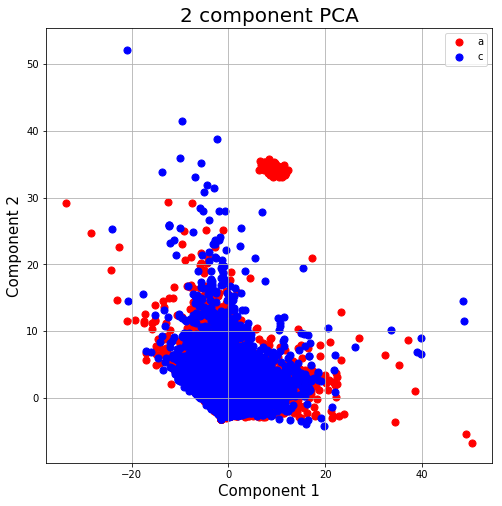

In [7]:

# Visualization of the alcoholic users
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['a', 'c']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['alcoholic'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                ,finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## Split training set and testing set

In [8]:
# It only has to be used once because of the unnecessary columns have been removed and we only take the three explicative variables 
# which are more relevant
from sklearn.model_selection import train_test_split

# Split the targets into training/testing sets

X_train, X_test, y_train, y_test= train_test_split(principalDf, y, test_size=0.5)



## Linear regression

In [15]:
from sklearn import linear_model
# Using linear regression
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set   
predictions = model.predict(X_test)
print('Prediction: \n',  predictions )


Prediction: 
 ['a' 'c' 'a' ... 'a' 'c' 'a']


C:\Users\Usuarioç\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
print('Accuracy got it from linear regression:',model.score(X_test, y_test))

Accuracy got it from linear regression: 0.5781170886075949


## Classification report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          a       0.57      0.71      0.63     32340
          c       0.59      0.44      0.51     30860

avg / total       0.58      0.58      0.57     63200



## Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')